In [7]:
!pip install matplotlib_scalebar

import numpy as np

from matplotlib import pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import pandas as pd
import glob, sep, tqdm, random, os
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from scipy.stats import norm, uniform
from lenstronomy.Util import image_util
from lenstronomy.Plots.lens_plot import lens_model_plot
from lenstronomy.LightModel.light_model import LightModel
from lenstronomy.ImSim.image_model import ImageModel
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Data.imaging_data import ImageData
from lenstronomy.Data.psf import PSF
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
import lenstronomy.Util.param_util as param_util
from lenstronomy.Util.image_util import add_poisson, add_background


Defaulting to user installation because normal site-packages is not writeable


In [2]:
sims_path = '/global/cfs/projectdirs/deepsrch/jwst_sims'

# Scaling

0 0.6929457693112283
1 0.5770742891437168
2 0.9084234986816214
3 1.4792433955369382
4 1.0131967757179505
5 1.053897706634586
6 1.360380966262529
7 1.2973043700417914
8 1.166081893221674
9 1.127524344624957
10 1.1866687088409245
11 1.0683219981525875
12 0.8259959866715381
13 1.4383469310582329
14 1.2430795308765348
15 1.4425826918078857
16 0.6811672713710314
17 1.3969394537284179
18 0.9043998592690115
19 0.7192506539059259
20 1.4013121143741873
21 1.100874699193336
22 1.1016725948059165
23 1.1648691648537814
24 0.5726864065091052


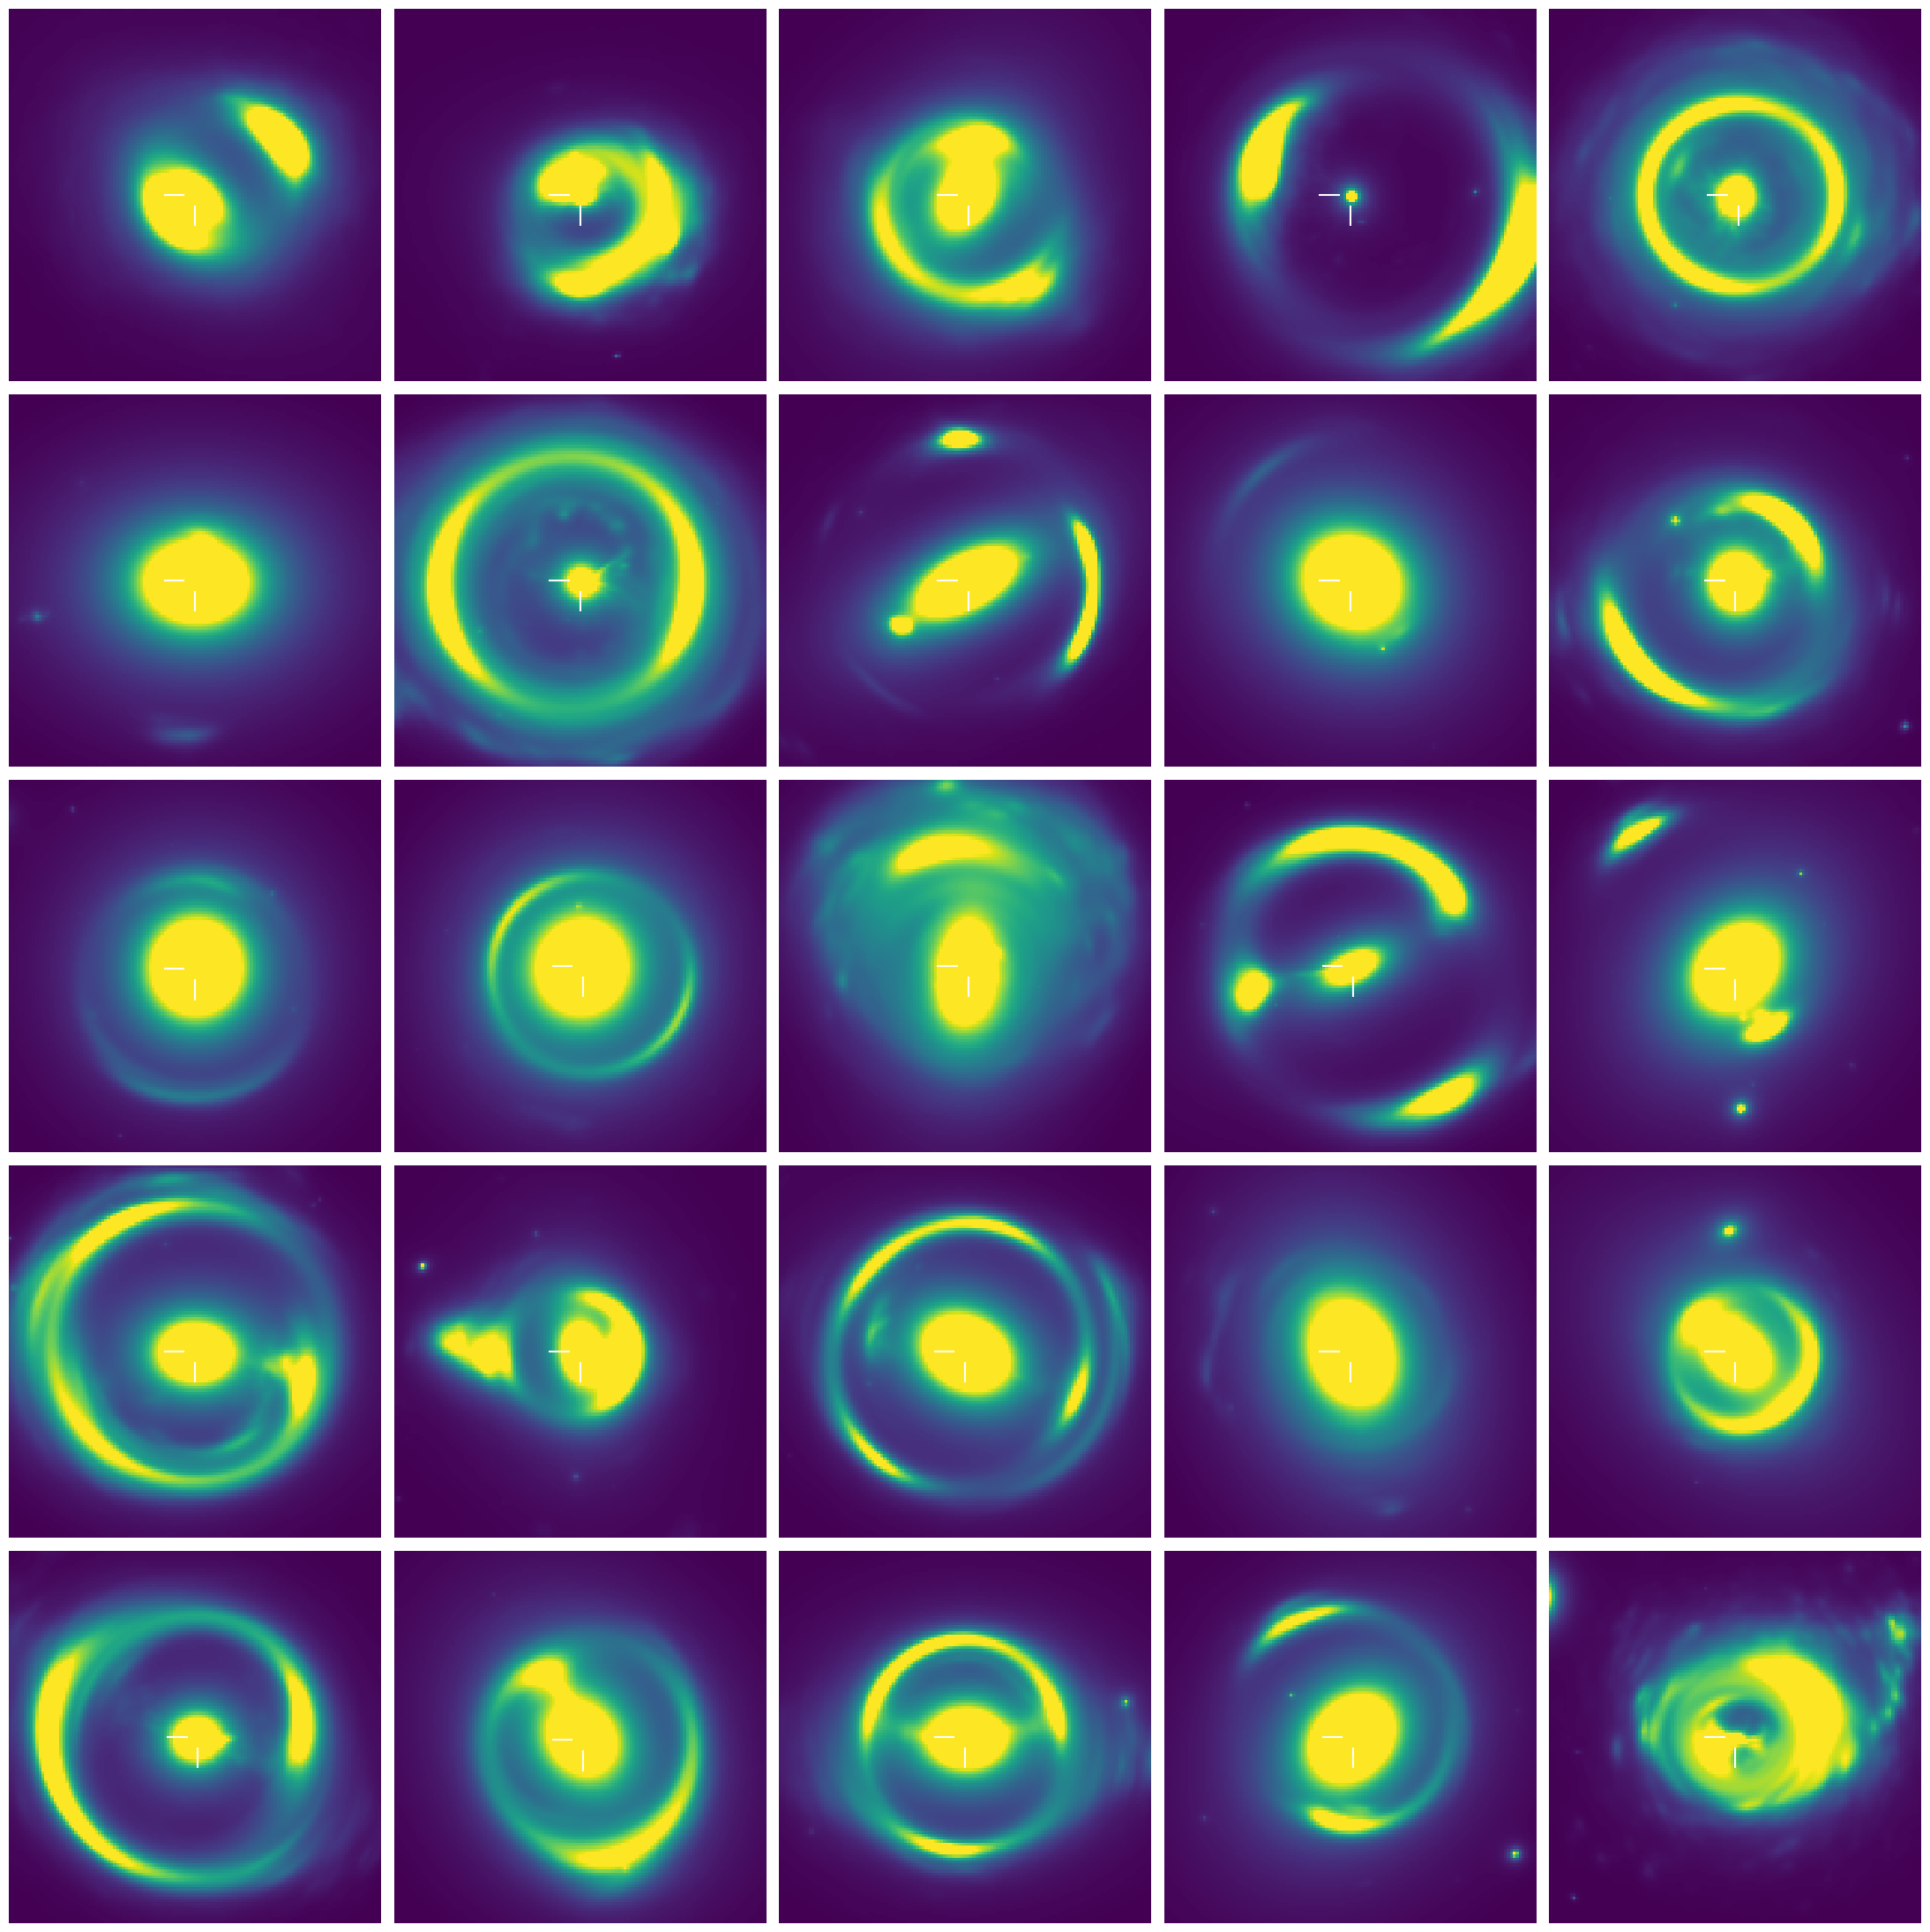

In [2]:
path = sims_path+'/pristine_bright/'
x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")

x0 = x0[y0==1]; no_lens = no_lens[y0==1];
theta_E = theta_E[y0==1]; y0 = y0[y0==1];
# x0 = x0[theta_E>.45]; theta_E = theta_E[theta_E>.45];

fig, axs = plt.subplots(5,5, dpi=100, figsize=(22,22))
for i in range(25):
    k=75
    im = x0[i+k]; print(i, theta_E[i+k])
    xl, yl = np.unravel_index(np.argmax(im-no_lens[i+k]),im.shape)

    axs[i//5,i%5].imshow(im, vmin=np.percentile(im,1),vmax=np.percentile(im,95))
    axs[i//5,i%5].hlines(xl, yl-10.5,yl-3.5, color="white", linewidth=1.5)
    axs[i//5,i%5].vlines(yl, xl+3.5,xl+10.5, color="white", linewidth=1.5)
    axs[i//5,i%5].axis('off')
plt.tight_layout();

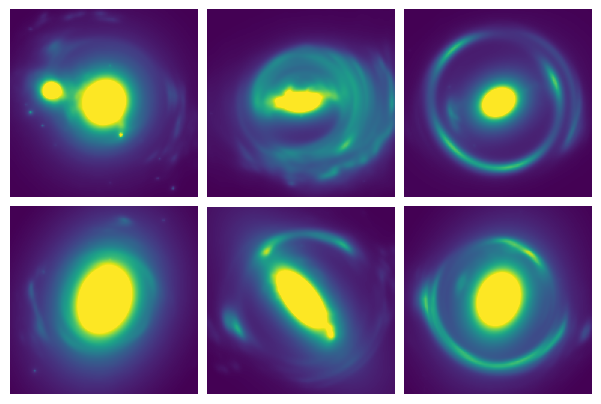

In [3]:
fig, axs = plt.subplots(2,3,figsize=(5*3/2,5))

x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")

x0 = x0[y0==1]; no_lens = no_lens[y0==1];
theta_E = theta_E[y0==1]; y0 = y0[y0==1];

im = x0[44]
axs[0,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
im = x0[45]
axs[0,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,98),origin="lower")
im = x0[92]
axs[0,2].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,98),origin="lower")

im = x0[93]
axs[1,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,92),origin="lower")
im = x0[233]
axs[1,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
im = x0[234]
axs[1,2].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")

axs[0,0].set_axis_off(); axs[0,1].set_axis_off(); axs[0,2].set_axis_off()
axs[1,0].set_axis_off(); axs[1,1].set_axis_off(); axs[1,2].set_axis_off()
plt.subplots_adjust(hspace=0.05,wspace=0.05);

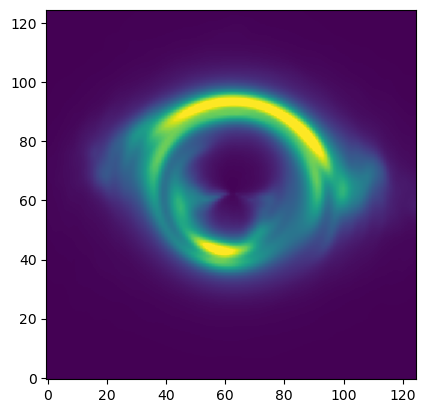

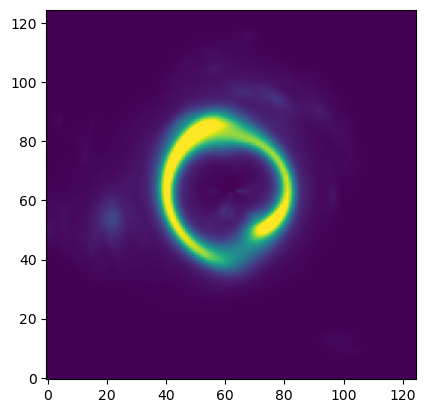

In [5]:
unlensed = np.load(path+"image_source.npy")
y0 = np.load(path+"lensed.npy")
theta_E = np.load(path+"theta_Es.npy")
theta_E = theta_E[y0==1]
unlensed = unlensed[y0==1][theta_E>.45]
im = unlensed[250+10]
plt.imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99), origin="lower")
# im0 = im.copy()

plt.figure()
x0 = np.load(path+"image_source.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")
x0 = x0[y0==1]; no_lens = no_lens[y0==1];
im = x0[11]
plt.imshow(im,vmin=np.percentile(im0,1),vmax=np.percentile(im0,99), origin="lower")
im0 = im.copy()

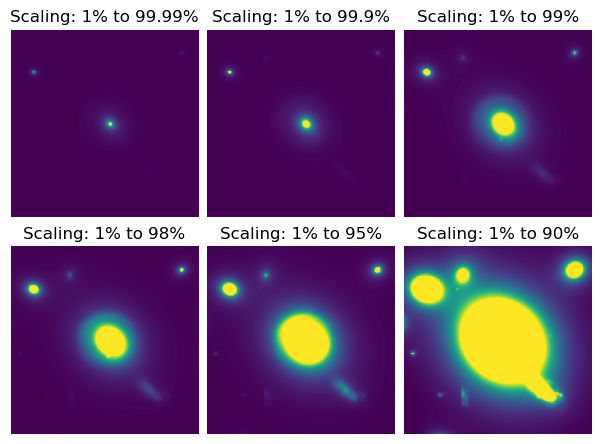

In [6]:
fig, axs = plt.subplots(2,3,figsize=(5*3/2,5.5))

path = sims_path+'/sims.15-.5/'
x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")

x0 = x0[y0==1]; no_lens = no_lens[y0==1];
theta_E = theta_E[y0==1]; y0 = y0[y0==1];
x0 = x0[theta_E>.45]; theta_E = theta_E[theta_E>.45];

# im = x0[80] # .5-1.5: 647/328 #74, 11
im = x0[263] # .15-.5: 71, 80, 154, 158, 235
axs[0,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99.99),origin="lower")
axs[0,0].set_title('Scaling: 1% to 99.99%')
axs[0,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99.9),origin="lower")
axs[0,1].set_title('Scaling: 1% to 99.9%')
axs[0,2].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99),origin="lower")
axs[0,2].set_title('Scaling: 1% to 99%')

axs[1,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,98),origin="lower")
axs[1,0].set_title('Scaling: 1% to 98%')
axs[1,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[1,1].set_title('Scaling: 1% to 95%')
axs[1,2].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,80),origin="lower")
axs[1,2].set_title('Scaling: 1% to 90%')

axs[0,0].set_axis_off(); axs[0,1].set_axis_off(); axs[0,2].set_axis_off()
axs[1,0].set_axis_off(); axs[1,1].set_axis_off(); axs[1,2].set_axis_off()
plt.subplots_adjust(hspace=0.05,wspace=0.05);

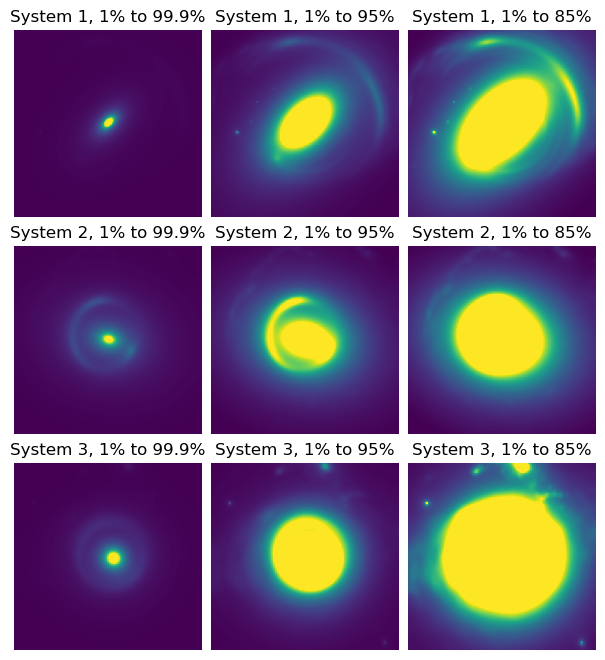

In [7]:
def rescale(im):
    image = (im-np.mean(im)) / np.std(im)
    scale = .05
    bkg = norm.rvs(loc=0.0, scale=scale, size=image.shape)
    exp_time = 10000
    poisson = image_util.add_poisson(image, exp_time=exp_time)
    return image# + bkg + poisson

path = sims_path+'/pristine_bright/'
x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")

x0 = x0[y0==1]; no_lens = no_lens[y0==1];
theta_E = theta_E[y0==1]; y0 = y0[y0==1];

fig, axs = plt.subplots(3,3,figsize=(5*3/2,8.3))
im = rescale(x0[7])

axs[0,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99.9),origin="lower")
axs[0,0].set_title('System 1, 1% to 99.9%')
axs[0,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[0,1].set_title('System 1, 1% to 95%')
axs[0,2].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,85),origin="lower")
axs[0,2].set_title('System 1, 1% to 85%')

im = rescale(x0[74]) #11
axs[1,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99.9),origin="lower")
axs[1,0].set_title('System 2, 1% to 99.9%')
axs[1,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[1,1].set_title('System 2, 1% to 95%')
axs[1,2].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,85),origin="lower")
axs[1,2].set_title('System 2, 1% to 85%')

path = sims_path+'/sims.15-.5/'
x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")

x0 = x0[y0==1]; no_lens = no_lens[y0==1];
theta_E = theta_E[y0==1]; y0 = y0[y0==1];
x0 = x0[theta_E>.45]; theta_E = theta_E[theta_E>.45];

im = rescale(x0[260]) #71, 235, 260
axs[2,0].imshow(im[20:-20,20:-20],vmin=np.percentile(im,1),vmax=np.percentile(im,99.9),origin="lower")
axs[2,0].set_title('System 3, 1% to 99.9%')
axs[2,1].imshow(im[20:-20,20:-20],vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[2,1].set_title('System 3, 1% to 95%')
axs[2,2].imshow(im[20:-20,20:-20],vmin=np.percentile(im,1),vmax=np.percentile(im,85),origin="lower")
axs[2,2].set_title('System 3, 1% to 85%')

axs[0,0].set_axis_off(); axs[0,1].set_axis_off(); axs[1,0].set_axis_off(); axs[1,1].set_axis_off()
axs[0,2].set_axis_off(); axs[1,2].set_axis_off(); axs[2,0].set_axis_off(); axs[2,1].set_axis_off(); axs[2,2].set_axis_off()
plt.subplots_adjust(hspace=0.05,wspace=0.05);

In [8]:
path = sims_path+'/sims.15-.5/'
images = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")
unlensed_source = np.load(path+"unlensed_source.npy")

images = images[y0==1]; no_lens = no_lens[y0==1];
lens = images - no_lens; unlensed_source = unlensed_source[y0==1]
theta_E = theta_E[y0==1]; y0 = y0[y0==1]
images = images[theta_E>.45]; unlensed_source = unlensed_source[theta_E>.45]
lens = lens[theta_E>.45]; theta_E = theta_E[theta_E>.45];

i=260

np.random.seed(2)
image = images[i]
# plt.imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
# fig, axs = plt.subplots(1,2)
image = lens[i]
# axs[0].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
image = unlensed_source[i]
# axs[1].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
# plt.figure()
image = lens[i] + unlensed_source[i]
# plt.imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")

lensModel = LensModel(['SIS'])
kwargs_lens = [{'theta_E':theta_E[i], 'center_x': 0.0, 'center_y': 0.0}]
# lens_model_plot(axs[0], lensModel, kwargs_lens, numPix=500, deltaPix=0.01, sourcePos_x=0, 
#                 sourcePos_y=0, point_source=False, with_caustics=False, with_convergence=True, 
#                 fast_caustic=True,coord_center_ra=0, coord_center_dec=0)

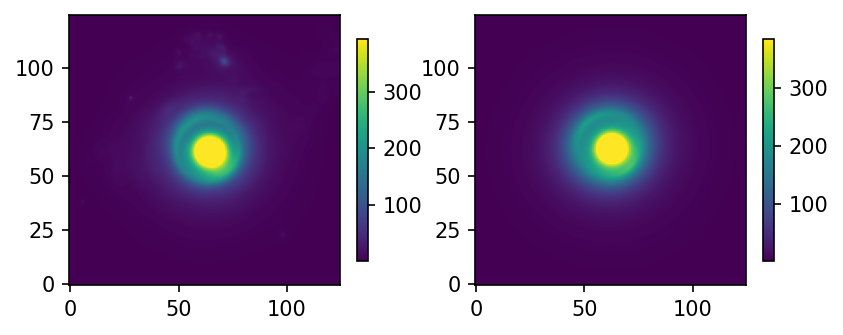

In [9]:
pixels=125; pixel_size=0.032165
kwargs_data = {'background_rms': 0, 'exposure_time': 1380,
               'ra_at_xy_0': -pixels/2*pixel_size, 'dec_at_xy_0': -pixels/2*pixel_size,
               'transform_pix2angle':np.array([[pixel_size, 0.  ], [0.  , pixel_size]]), 
               'image_data': np.zeros((pixels, pixels))}
kwargs_numerics = {'supersampling_factor': 1, 'supersampling_convolution': False}
data_class = ImageData(**kwargs_data)
kwargs_psf = {'psf_type': 'GAUSSIAN', 'fwhm': 0.03, 'pixel_size': pixel_size, 'truncation': 3}
psf_class = PSF(**kwargs_psf)

lens_model_class = LensModel(['SIE'])
source_model_class = LightModel(['SERSIC_ELLIPSE'])
lens_light_model_class = LightModel(['SERSIC_ELLIPSE'])
image_model = ImageModel(data_class=data_class, psf_class=psf_class, lens_model_class=lens_model_class, 
    source_model_class=source_model_class, lens_light_model_class=lens_light_model_class,
    kwargs_numerics=kwargs_numerics)

e1, e2 = param_util.phi_q2_ellipticity(phi=0, q=1); n_sersic=3;
#theta_E[i]
kwargs_lens = [{'theta_E':theta_E[i], 'center_x': 0.0, 'center_y': 0.0, 'e1':e1,'e2':e2}]
kwargs_lens_light = [{'amp':200000, 'R_sersic': .3, 'n_sersic': n_sersic, 'e1':e1, 'e2':e2, 'center_x': 0.0, 'center_y': 0.0}]
e1, e2 = param_util.phi_q2_ellipticity(phi=.3, q=0.8)
center_x=-.05; center_y=.05; n_sersic=1;
kwargs_source = [{'amp':30000, 'R_sersic': .3, 'n_sersic': n_sersic, 'e1':e1, 'e2':e2, 'center_x': center_x, 'center_y': center_y}]
image = image_model.image(kwargs_lens, kwargs_source, kwargs_lens_light=kwargs_lens_light, kwargs_ps=None,
                               source_add=True, lens_light_add=True)

fig, axs = plt.subplots(1,2,dpi=150)
im=axs[1].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
sersic_image = image.copy()
plt.colorbar(im,ax=axs[1],shrink=.4)
image = images[i]
im=axs[0].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
plt.colorbar(im,ax=axs[0],shrink=.4)


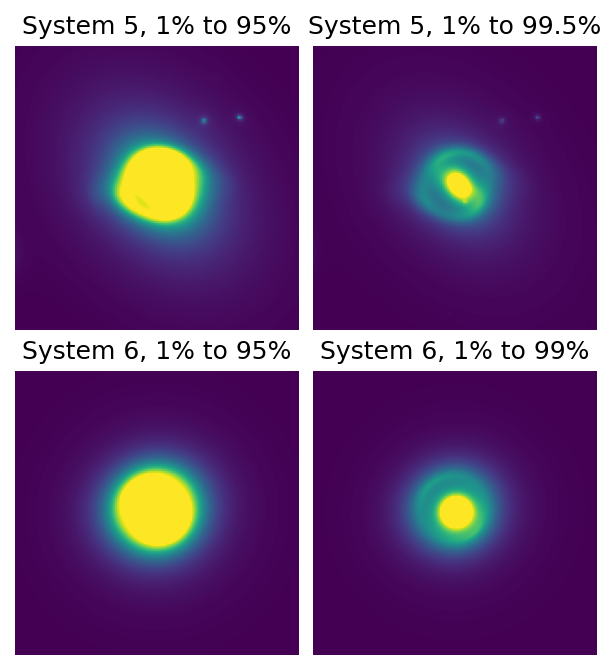

In [10]:
fig, axs = plt.subplots(2,2,dpi=150,figsize=(5,5.5))

path = sims_path+'/sims.15-.5/'
x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")

x0 = x0[y0==1]; no_lens = no_lens[y0==1];
theta_E = theta_E[y0==1]; y0 = y0[y0==1];
x0 = x0[theta_E>.45]; theta_E = theta_E[theta_E>.45];

im = rescale(x0[71])
axs[0,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[0,0].set_title('System 5, 1% to 95%'); axs[0,0].set_axis_off()
axs[0,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99.5),origin="lower")
axs[0,1].set_title('System 5, 1% to 99.5%'); axs[0,1].set_axis_off()

im = sersic_image.copy()
axs[1,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[1,0].set_title('System 6, 1% to 95%'); axs[1,0].set_axis_off()
axs[1,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99),origin="lower")
axs[1,1].set_title('System 6, 1% to 99%'); axs[1,1].set_axis_off()

plt.subplots_adjust(hspace=0.05,wspace=0.05);

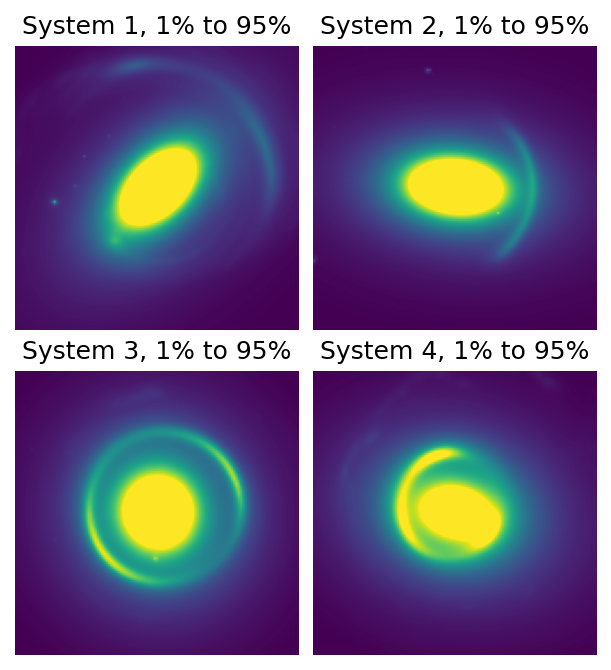

In [11]:
def rescale(im):
    image = (im-np.mean(im)) / np.std(im)
    scale = .05
    bkg = norm.rvs(loc=0.0, scale=scale, size=image.shape)
    exp_time = 10000
    poisson = image_util.add_poisson(image, exp_time=exp_time)
    return image# + bkg + poisson

fig, axs = plt.subplots(2,2,dpi=150,figsize=(5,5.5))

path = sims_path+'/pristine_bright/'
x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")

x0 = x0[y0==1]; no_lens = no_lens[y0==1];
theta_E = theta_E[y0==1]; y0 = y0[y0==1];

im = rescale(x0[7])
axs[0,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[0,0].set_title('System 1, 1% to 95%'); axs[0,0].set_axis_off()
im = rescale(x0[14])
axs[0,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[0,1].set_title('System 2, 1% to 95%'); axs[0,1].set_axis_off()

im = rescale(x0[86])
axs[1,0].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[1,0].set_title('System 3, 1% to 95%'); axs[1,0].set_axis_off()
im = rescale(x0[74])
axs[1,1].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,95),origin="lower")
axs[1,1].set_title('System 4, 1% to 95%'); axs[1,1].set_axis_off()

plt.subplots_adjust(hspace=0.05,wspace=0.05);

# ABC Examples

In [3]:
# pristine_bright: 3 = quad (C)
# .15-.5: 7 = small ring (C)
# .15-.5: 52 = small A

1.0 0.732093719690017
1.0 0.4515407693435485
1.0 0.05708900882142953
1.0 1.457210125705916
1.0 0.2340085726591697
1.0 0.8925197014168951


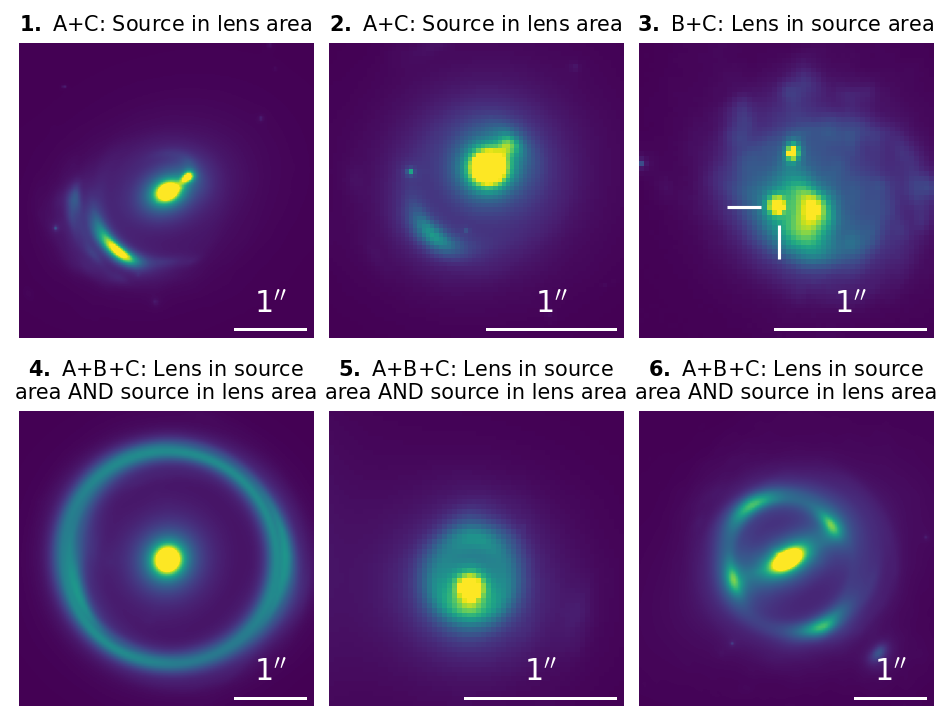

In [4]:
titles={8:r'A+C: Source in lens area',
        103:r'B+C: Lens in source area',
        6:r'A+B+C: Lens in source'+'\narea AND source in lens area',
        225:r'A+C: Source in lens area', 
        7:r'A+B+C: Lens in source'+'\narea AND source in lens area',
        3:r'A+B+C: Lens in source'+'\narea AND source in lens area'}
fig, axs = plt.subplots(2,3, dpi=150)
for j in range(6):
    i = [8,225,103,6,7,3][j]
    if i==3 or i==8 or i==6:
        path = sims_path+'/pristine_bright/'
    elif i==103:
        path = sims_path+'/sims.02-.15_s/'
    elif i==225 or i==7:
        path = sims_path+'/sims.15-.5/'
    else:
        assert(1==0)

    x0 = np.load(path+"images.npy")
    y0 = np.load(path+"lensed.npy")
    no_lens = np.load(path+"no_lens.npy")
    theta_E = np.load(path+"theta_Es.npy")
    x0 = x0[y0==1]; no_lens = no_lens[y0==1];
    theta_E = theta_E[y0==1];
    im = x0[i]; print(y0[y0==1][i], theta_E[i])
    xl, yl = np.unravel_index(np.argmax(im-no_lens[i]),im.shape)
    if i==225:
        im = im[30:100,30:100]; xl-=20;yl-=40
    if i==7:
        im = im[30:90,35:95]; xl-=30;yl-=30
    if i==103:
        im = im[30:90,30:90]; xl-=30;yl-=30
    if i==225:
        vmax=99.0
    else:
        vmax=99.5
    axs[j//3,j%3].imshow(im, vmin=np.percentile(im,0),vmax=np.percentile(im,vmax))
    if i==103:
        axs[j//3,j%3].hlines(xl, yl-10.5,yl-3.5, color="white", linewidth=1.5)
        axs[j//3,j%3].vlines(yl, xl+3.5,xl+10.5, color="white", linewidth=1.5)
        
    scalebar = ScaleBar(0.032165, "''", dimension='angle', length_fraction=0.25,
                       location='lower right',frameon=False,color="white",scale_loc="top",
                       font_properties={'size':'x-large'})
    axs[j//3,j%3].add_artist(scalebar)
    axs[j//3,j%3].axis('off')
    axs[j//3,j%3].set_title(r'$\mathbf{'+str(j+1)+'.}$ '+titles[i], fontsize="medium")
plt.tight_layout()
plt.subplots_adjust(hspace=0.25,wspace=0.05);

1.0 0.732093719690017
1.0 0.4515407693435485
1.0 0.05708900882142953
1.0 1.457210125705916
1.0 0.2340085726591697
1.0 0.8925197014168951


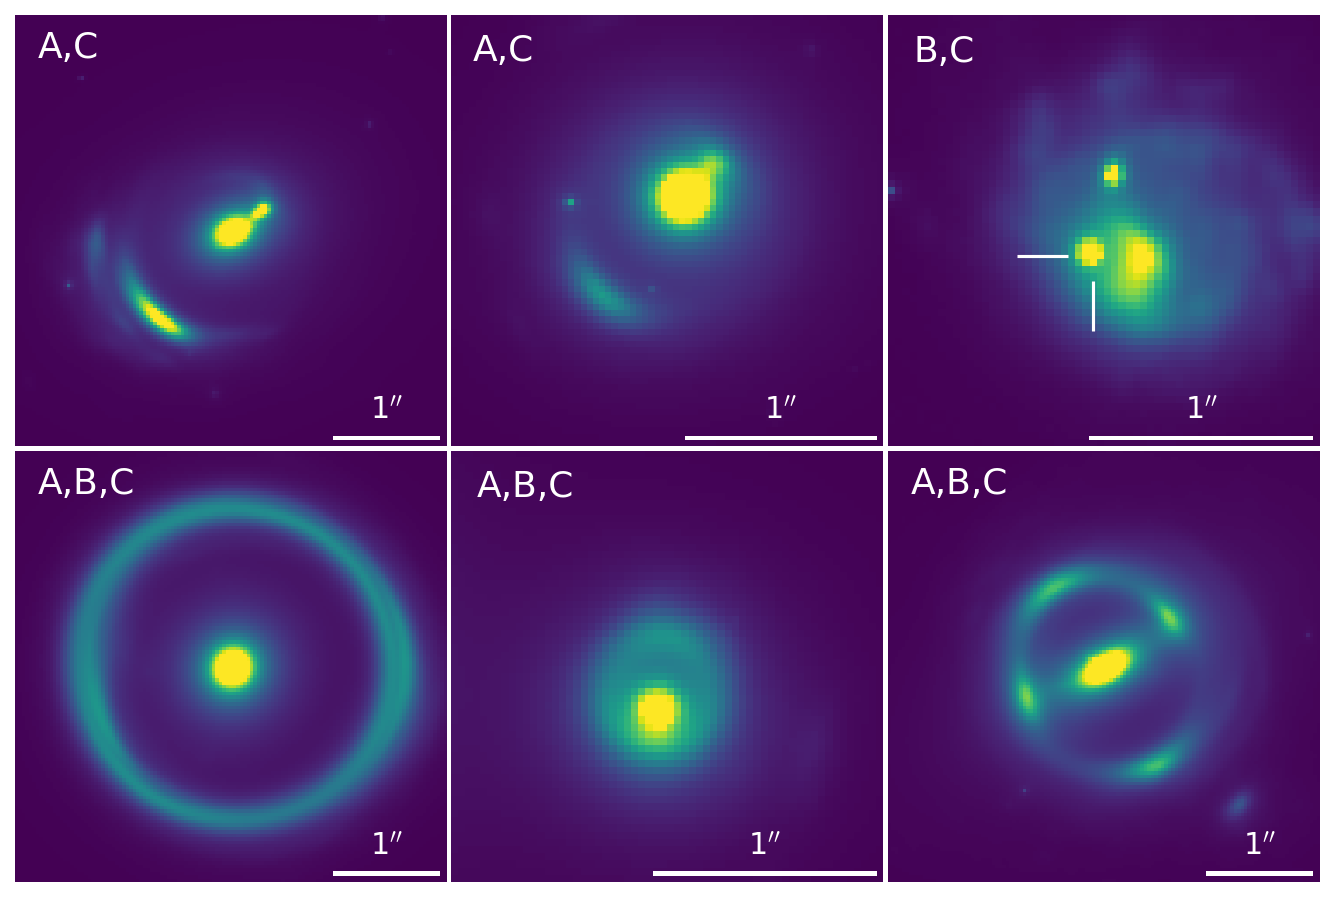

In [19]:
titles={8:r'A,C',
        103:r'B,C',
        6:r'A,B,C',
        225:r'A,C', 
        7:r'A,B,C',
        3:r'A,B,C'}
fig, axs = plt.subplots(2,3, figsize=(9,6.08),dpi=150)
for j in range(6):
    i = [8,225,103,6,7,3][j]
    if i==3 or i==8 or i==6:
        path = sims_path+'/pristine_bright/'
    elif i==103:
        path = sims_path+'/sims.02-.15_s/'
    elif i==225 or i==7:
        path = sims_path+'/sims.15-.5/'
    else:
        assert(1==0)

    x0 = np.load(path+"images.npy")
    y0 = np.load(path+"lensed.npy")
    no_lens = np.load(path+"no_lens.npy")
    theta_E = np.load(path+"theta_Es.npy")
    x0 = x0[y0==1]; no_lens = no_lens[y0==1];
    theta_E = theta_E[y0==1];
    im = x0[i]; print(y0[y0==1][i], theta_E[i])
    xl, yl = np.unravel_index(np.argmax(im-no_lens[i]),im.shape)
    if i==225:
        im = im[30:100,30:100]; xl-=20;yl-=40
    if i==7:
        im = im[30:90,35:95]; xl-=30;yl-=30
    if i==103:
        im = im[30:90,30:90]; xl-=30;yl-=30
    if i==225:
        vmax=99.0
    else:
        vmax=99.5
    axs[j//3,j%3].imshow(im, vmin=np.percentile(im,0),vmax=np.percentile(im,vmax))
    if i==103:
        axs[j//3,j%3].hlines(xl, yl-10.5,yl-3.5, color="white", linewidth=1.5)
        axs[j//3,j%3].vlines(yl, xl+3.5,xl+10.5, color="white", linewidth=1.5)
        
    scalebar = ScaleBar(0.032165, "''", dimension='angle', length_fraction=0.25,
                       location='lower right',frameon=False,color="white",scale_loc="top",
                       font_properties={'size':'x-large'})
    axs[j//3,j%3].add_artist(scalebar)
    axs[j//3,j%3].axis('off')
    axs[j//3,j%3].text(int(im.shape[0]*.05),int(im.shape[0]*.1),titles[i],color="white",fontsize="xx-large")
plt.tight_layout()
plt.subplots_adjust(hspace=0.01,wspace=0.01);

# Williams cutouts

In [17]:
with fits.open(sims_path+'/datasets/JWST/goods_s_F115W_2018_08_29.fits') as hdul:
    header = hdul[0].header
    sim = hdul[0].data * header['GAIN']
wcs = WCS(header)

with fits.open(sims_path+'/datasets/JWST/JADES_SF_mock_r1_v1.1.fits') as hdul:
    data_sf = hdul[1].data
with fits.open(sims_path+'/datasets/JWST/JADES_Q_mock_r1_v1.1.fits') as hdul:
    data_q = hdul[1].data
    
dec = [-27.83, -27.785]
ra = [53.137, 53.222]

cut_sf= data_sf[data_sf['RA']>53.137]
cut_sf = cut_sf[cut_sf['RA']<53.222]
cut_sf = cut_sf[cut_sf['DEC']>-27.83]
cut_sf = cut_sf[cut_sf['DEC']<-27.785]
cut_q= data_q[data_q['RA']>53.137]
cut_q = cut_q[cut_q['RA']<53.222]
cut_q = cut_q[cut_q['DEC']>-27.83]
cut_q = cut_q[cut_q['DEC']<-27.785]

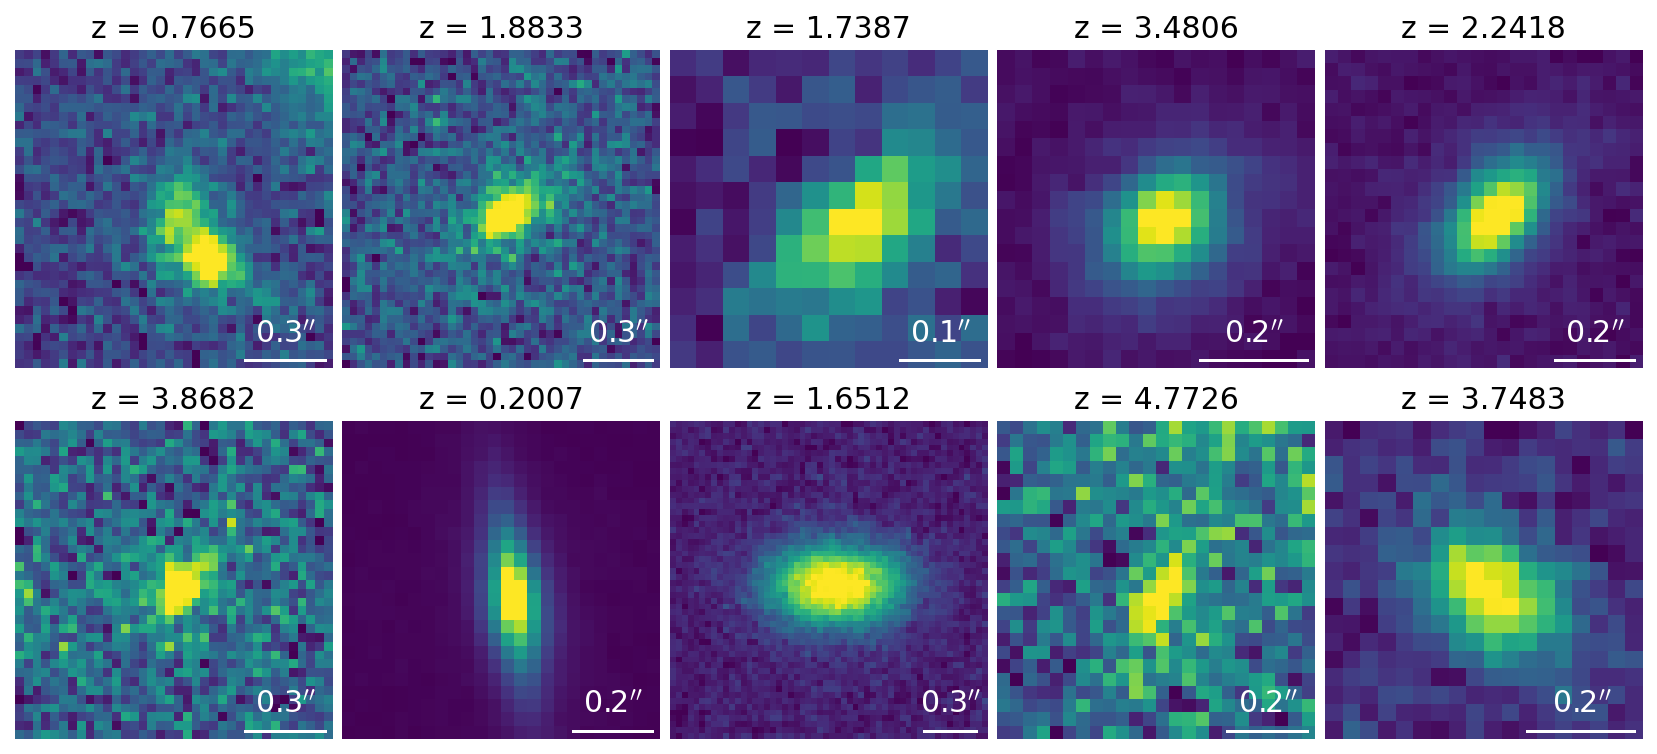

In [18]:
fig, axs = plt.subplots(2,5, dpi=150, figsize=(14,6))
i=0
fixed_values = [0.3,0.3,0.1,0.2,0.2,0.3,0.2,0.3,0.2,0.2]
np.random.seed(0)
for i in range(10):
    j=np.random.choice(len(cut_sf))
    gal = np.zeros((2,2))
    while gal[gal.shape[0]//2,gal.shape[0]//2]<5*1.615479000000E-01:
        bright = cut_sf[j]
        R = int(bright['Re_maj']/.03)*3
        if R>5:
            ra, dec = bright['RA'], bright['DEC']
            sky = SkyCoord(str(ra)+"d "+str(dec)+"d")
            x, y = wcs.world_to_pixel(sky)
            x, y = int(x), int(y)
            gal = sim[y-R:y+R,x-R:x+R]
            # print(j, np.max(gal)/(5*1.615479000000E-01))
        j += 1
        if j==len(cut_sf):
            j=0
    
    axs[i//5,i%5].imshow(gal,vmin=np.percentile(gal,1),vmax=np.percentile(gal,99))
    axs[i//5,i%5].axis('off')
    axs[i//5,i%5].set_title("z = "+str(round(bright['redshift'],4)), fontsize="x-large")
    
    scalebar = ScaleBar(0.032165, "''", dimension='angle', fixed_value=fixed_values[i],
                   location='lower right',frameon=False,color="white",scale_loc="top",
                   font_properties={'size':'x-large'})
    axs[i//5,i%5].add_artist(scalebar)

    # axs[i//5,i%5].hlines(gal.shape[0]*.9, gal.shape[0]*.9-.2/0.032165,gal.shape[0]*9//10, color="white", linewidth=3)
    # axs[i//5,i%5].text(gal.shape[0]*.9-.2/0.032165,gal.shape[0]*.85,'0.2"', color="white", fontsize=20)
# plt.tight_layout()
plt.subplots_adjust(hspace=0.15,wspace=0.03);

# Simulation histograms

0.15140846742750003
0.20000454439307802
0.2001844456536156


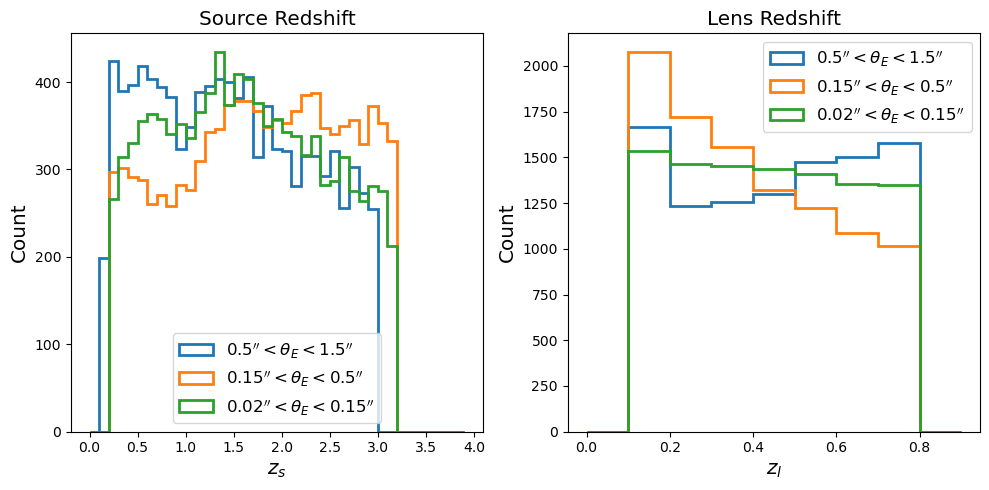

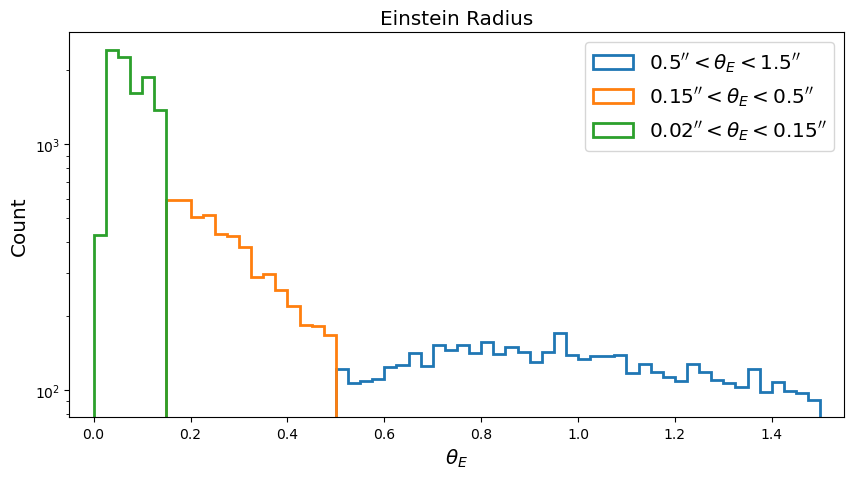

In [4]:
path1 = sims_path+'/pristine_bright/'
path2 = sims_path+'/sims.15-.5/'
path3 = sims_path+'/sims.02-.15_s/'
paths = [path1, path2,path3]; labels=[r"$0.5''<\theta_E<1.5''$",r"$0.15''<\theta_E<0.5''$",r"$0.02''<\theta_E<0.15''$"]
tebins = [np.arange(.3,1.7,.025), np.arange(.1,.6,.025),np.arange(.0,.175,.025)]
fig, axs = plt.subplots(1,2,dpi=100, figsize=(10,5))
for i in range(len(paths)):
    lensed = np.load(paths[i]+'lensed.npy')
    z_source = np.load(paths[i]+'z_source.npy')[lensed==1]
    print(z_source.min())
    axs[0].hist(z_source, linewidth=2, bins=np.arange(0, 4.0,0.1), label=labels[i],histtype='step')
    z_lens = np.load(paths[i]+'z_lens.npy')[lensed==1]
    axs[1].hist(z_lens, linewidth=2, bins=np.arange(0, 1.0,0.1), label=labels[i],histtype='step')

axs[0].legend(fontsize='large');
axs[0].set_xlabel(r'$z_s$', fontsize='x-large')
axs[0].set_ylabel('Count', fontsize='x-large')
axs[0].set_title('Source Redshift', fontsize='x-large')
axs[1].legend(fontsize='large');
axs[1].set_xlabel(r'$z_l$', fontsize='x-large')
axs[1].set_ylabel('Count', fontsize='x-large')
axs[1].set_title('Lens Redshift', fontsize='x-large')
axs[0].legend(fontsize='large');
plt.tight_layout();

plt.figure(dpi=100,figsize=(10,5))
for i in range(len(paths)):
    theta_E = np.load(paths[i]+'theta_Es.npy')[lensed==1]
    plt.hist(theta_E, linewidth=2, bins=tebins[i], label=labels[i],histtype='step')
plt.xlabel(r'$\theta_E$', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.title('Einstein Radius', fontsize='x-large')
plt.legend(fontsize='x-large')
plt.xlim(-.05,1.55)
plt.yscale('log')


0.2712280701754386


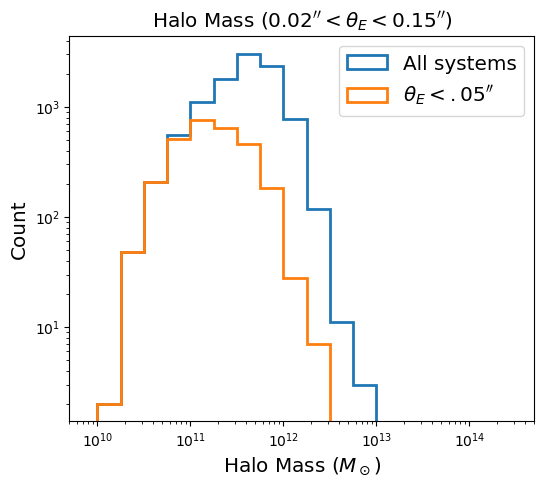

In [4]:
plt.figure(dpi=100,figsize=(6,5))
mass = np.load(paths[2]+'masses.npy')[lensed==1]
tes = np.load(paths[2]+'theta_Es.npy')[lensed==1]
plt.hist(mass, linewidth=2, bins=np.logspace(9,14,21), label="All systems",histtype='step', log=True)
mass = mass[tes<.05]
plt.hist(mass, linewidth=2, bins=np.logspace(9,14,21), label=r"$\theta_E<.05''$",histtype='step', log=True)
frac = np.sum(mass<=1e11)/len(mass)
print(frac)
plt.xlabel(r'Halo Mass ($M_\odot$)', fontsize='x-large')
plt.ylabel('Count', fontsize='x-large')
plt.title(r"Halo Mass ($0.02''<\theta_E<0.15''$)", fontsize='x-large')
plt.legend(fontsize='x-large', loc='upper right')
plt.xlim(5e9,5e14)
plt.xscale('log')

In [15]:
lensed = np.load('/global/cfs/projectdirs/deepsrch/jwst_sims/sims.02-.15_s/lensed.npy')
np.random.seed(12)
indices = np.arange(len(lensed))
np.random.shuffle(indices)
start = len(lensed)//5 * 0 #0
end = len(lensed)//5 * 1 #1
val_inds = indices[start:end]

lensed = np.load('/global/cfs/projectdirs/deepsrch/jwst_sims/sims.02-.15_s/lensed.npy')
lensed = lensed[val_inds]
masses = np.load('/global/cfs/projectdirs/deepsrch/jwst_sims/sims.02-.15_s/masses.npy')
masses = masses[val_inds][(lensed==1)]
len(masses), np.sum(masses<=1e11)

(2001, 172)

# Simulation examples

0.0159290954018122 13006.883844969472
0.18806295440836732 25113.549085116905
0.17336993541431414 4814.426007197962
0.13866562106567346 61118.63571630896
0.012433905392017853 742.7555899821874
0.10943105021361195 1587.9244071496682
0.12920999667421282 11.25269943089071
0.04813302616442037 36.2318323448429
0.06737457554154995 246.37715055741234
0.13441745459425813 248.9670873134502
0.14995076857023734 3928.809103290426
0.18494276473426252 20055.247385658342
0.1092938413450667 13187.91137776432
0.1465557853845081 3996.9566956272715
0.002506043177740658 16581.96988314781
0.18422825930599704 51491.55414506202
0.12144693054840644 16.51272537419264
0.14032897754805912 13921.87764321372
0.17124948715150792 2339.908926397469
0.19717607468812703 72556.6941636746
0.08434440641702967 9163.817313137379
0.061463047489382694 37.34648278200582
0.13684190858425394 5004.64666275863
0.17361748742993166 11.185821957860943
0.027317550424804327 19.445764754980996


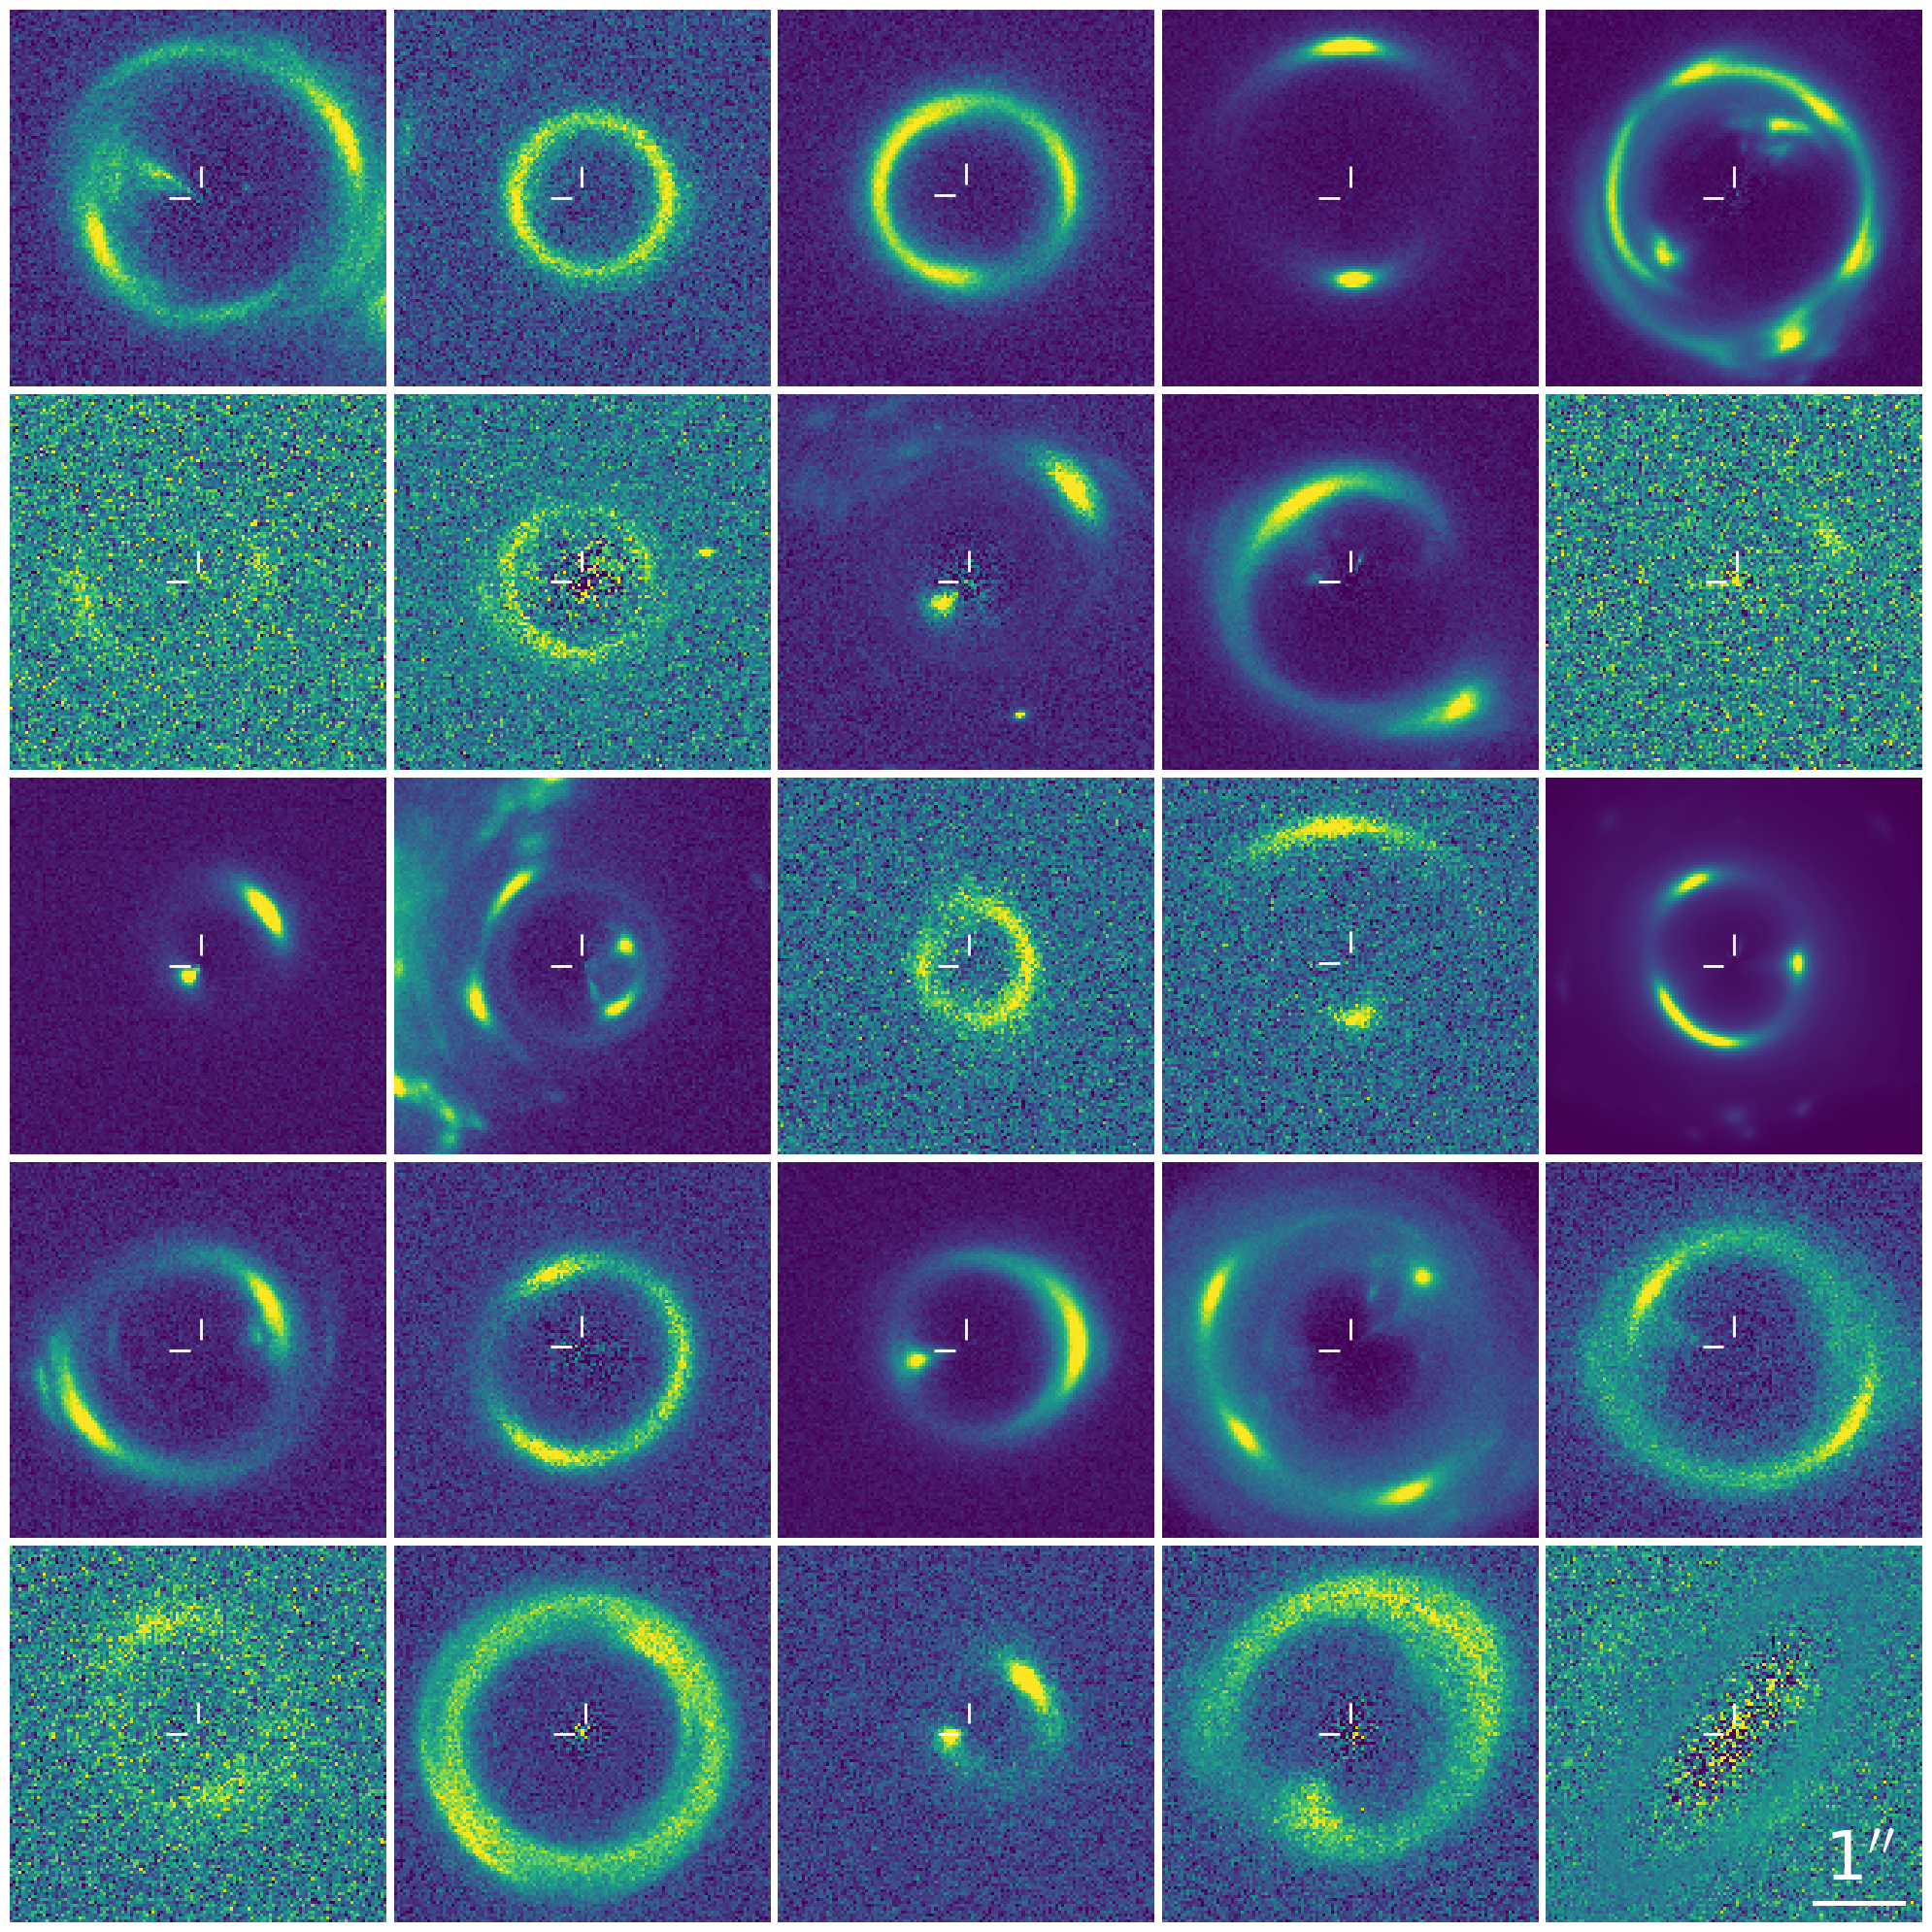

In [30]:
path = sims_path+'/pristine_bright/'
# path = sims_path+'/sims.02-.15_s/'
noise_level = 'hst' #jwst, hst, none

lensed = np.load(path+'lensed.npy')
images = np.load(path+'images.npy')[lensed==1]
no_lens = np.load(path+'no_lens.npy')[lensed==1]
np.random.seed(2)
rand_choice = np.random.choice(len(images),size=25)
images = images[rand_choice]
no_lenses = no_lens[rand_choice]
fig, axs = plt.subplots(5,5, dpi=100, figsize=(20,20))
i=0
while i<25:
    # image= images[np.random.choice(len(images))]
    image = images[i]
    #image = (image-np.mean(image)) / np.mean(np.std(images,axis=0))
    if noise_level=='jwst':
        exp_time = 10000
        bkg_rms = np.sqrt((1.615479000000E-01)**2-(0.1615479/10**1.25)**2)
        poisson = add_poisson(image/1.547190779092E+02, exp_time=exp_time)*1.547190779092E+02
        bkg = add_background(image, sigma_bkd=bkg_rms)
        image = image + bkg + poisson
    no_lens = (no_lenses[i]-np.mean(image))/np.std(image)
    image = (image-np.mean(image)) / np.std(image)
    scale = uniform.rvs(0,.2)
    bkg = norm.rvs(loc=0.0, scale=scale, size=image.shape)
    exp_time = 10**uniform.rvs(1,4)
    poisson = image_util.add_poisson(image, exp_time=exp_time)
    if noise_level=='hst':
        image = image + bkg + poisson
        image = no_lens + bkg + poisson

    # image = np.log(image-np.min(image)+1e-6)
    im = axs[i//5,i%5].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99.5), origin="lower")
    # plt.colorbar(im,ax=axs[i//5,i%5],shrink=.6)
        
    axs[i//5,i%5].axis('off')
    # axs[i//5,i%5].set_title(str(np.round(theta_E, 3))+'"/z_d='+str(np.round(z_lens,2))+"/z_s="+str(np.round(z_source,2)), fontsize="x-large")
    
    xl, yl = np.unravel_index(np.argmax(images[i]-no_lenses[i]),image.shape)
    axs[i//5,i%5].hlines(xl, yl-10.5,yl-3.5, color="white", linewidth=2)
    axs[i//5,i%5].vlines(yl, xl+3.5,xl+10.5, color="white", linewidth=2)

    i += 1
    print(scale,exp_time)
    
scalebar = ScaleBar(0.032165, "''", dimension='angle', fixed_value=1, width_fraction=.015, border_pad=1.,
               location='lower right',frameon=False,color="white",scale_loc="top",
               font_properties={'size':50})
axs[4,4].add_artist(scalebar)
plt.tight_layout()
plt.subplots_adjust(hspace=0.02,wspace=0.02);

(-0.5, 124.5, -0.5, 124.5)

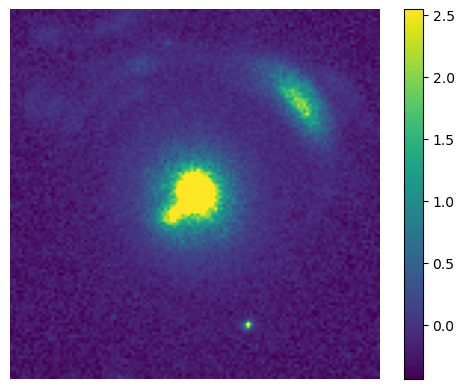

In [22]:
image = images[7] #2,7
image = (image-np.mean(image)) / np.std(image)
scale = 0.17336993541431414
exp_time = 4814.426007197962
scale = 0.04813302616442037
exp_time = 36.2318323448429

bkg = norm.rvs(loc=0.0, scale=scale, size=image.shape)
poisson = image_util.add_poisson(image, exp_time=exp_time)
image = image + bkg + poisson

im=image
plt.imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99), origin="lower")
plt.colorbar()
plt.axis('off')

<Axes: >

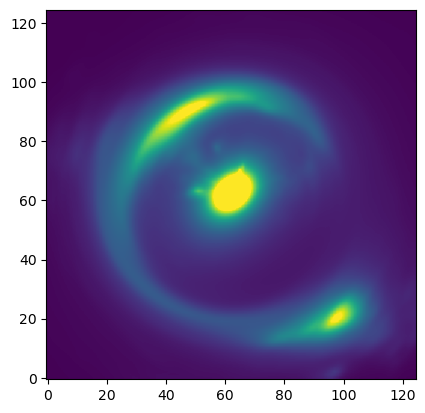

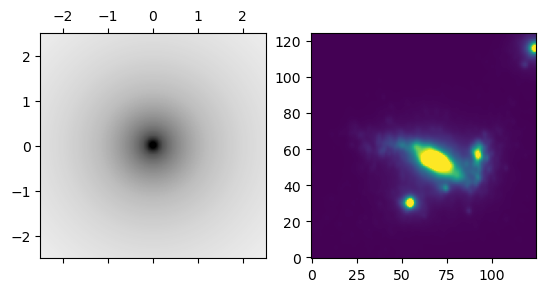

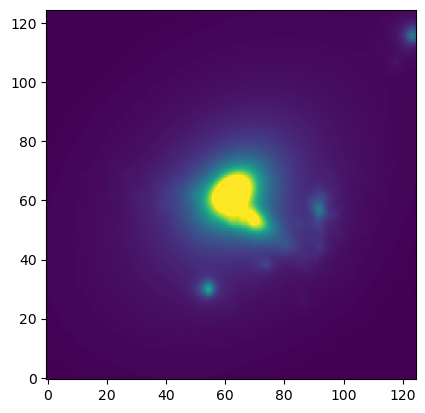

In [23]:
path=sims_path+'/pristine_bright/"
lensed = np.load(path+'lensed.npy')
images = np.load(path+'images.npy')[lensed==1]
unlensed_source = np.load(path+'unlensed_source.npy')[lensed==1]
no_lens = np.load(path+'no_lens.npy')[lensed==1]
z_lens = np.load(path+'z_lens.npy')[lensed==1]
z_source = np.load(path+'z_source.npy')[lensed==1]
theta_Es = np.load(path+'theta_Es.npy')[lensed==1]
lens = images - no_lens

i=8

np.random.seed(2)
inds = np.random.choice(len(images),size=25)
image = images[inds[i]]
plt.imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
fig, axs = plt.subplots(1,2)
image = lens[inds[i]]
axs[0].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
image = unlensed_source[inds[i]]
axs[1].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
plt.figure()
image = lens[inds[i]] + unlensed_source[inds[i]]
plt.imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")

lensModel = LensModel(['SIS'], z_lens=z_lens[inds[i]], z_source=z_source[inds[i]])
kwargs_lens = [{'theta_E':theta_Es[inds[i]], 'center_x': 0.0, 'center_y': 0.0}]
lens_model_plot(axs[0], lensModel, kwargs_lens, numPix=500, deltaPix=0.01, sourcePos_x=0, 
                sourcePos_y=0, point_source=False, with_caustics=False, with_convergence=True, 
                fast_caustic=True,coord_center_ra=0, coord_center_dec=0)

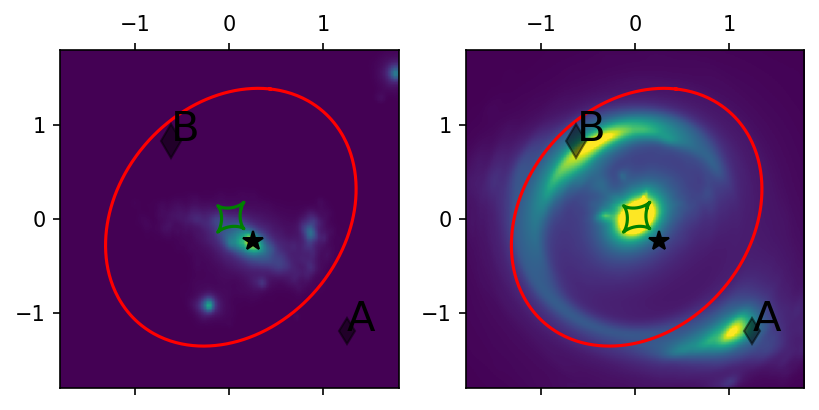

In [24]:
fig, axs = plt.subplots(1,2,dpi=150)
lensModel = LensModel(['SIE'], z_lens=z_lens[inds[i]], z_source=z_source[inds[i]])
e1, e2 = param_util.phi_q2_ellipticity(phi=.85, q=0.8)
kwargs_lens = [{'theta_E':theta_Es[inds[i]], 'center_x': 0.0, 'center_y': 0.0, 'e1':e1,'e2':e2}]
lens_model_plot(axs[0], lensModel, kwargs_lens, numPix=120, deltaPix=0.03, sourcePos_x=0.24, 
                sourcePos_y=-0.25, point_source=True, with_caustics=True, with_convergence=True, 
                fast_caustic=True,coord_center_ra=0, coord_center_dec=0)
lens_model_plot(axs[1], lensModel, kwargs_lens, numPix=120, deltaPix=0.03, sourcePos_x=0.24, 
                sourcePos_y=-0.25, point_source=True, with_caustics=True, with_convergence=True, 
                fast_caustic=True,coord_center_ra=0, coord_center_dec=0)
image = images[inds[i]]
axs[0].set_xlim(-1.8,1.8); axs[0].set_ylim(-1.8,1.8)
axs[1].set_xlim(-1.8,1.8); axs[1].set_ylim(-1.8,1.8)
axs[1].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99),
              extent=[-1.8,1.8,-1.8,1.8],origin="lower")
axs[0].imshow(unlensed_source[inds[i]], vmin=np.percentile(image,1), vmax = np.percentile(image,99),
              extent=[-1.8,1.8,-1.8,1.8],origin="lower")

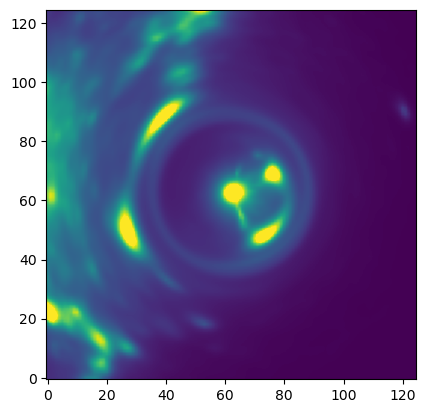

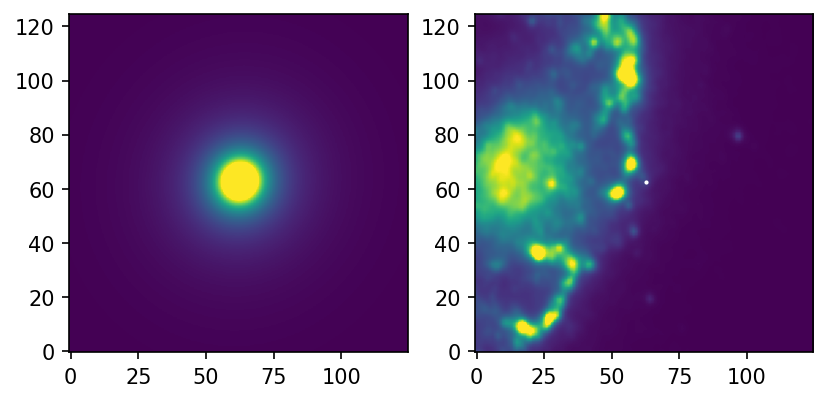

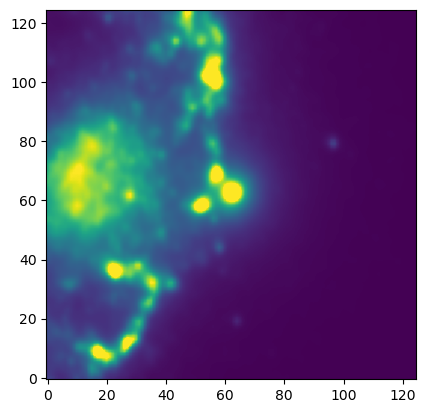

In [25]:
path=sims_path+'/pristine_bright/"
lensed = np.load(path+'lensed.npy')
images = np.load(path+'images.npy')[lensed==1]
unlensed_source = np.load(path+'unlensed_source.npy')[lensed==1]
no_lens = np.load(path+'no_lens.npy')[lensed==1]
z_lens = np.load(path+'z_lens.npy')[lensed==1]
z_source = np.load(path+'z_source.npy')[lensed==1]
theta_Es = np.load(path+'theta_Es.npy')[lensed==1]
lens = images - no_lens

i=11

np.random.seed(2)
inds = np.random.choice(len(images),size=25)
image = images[inds[i]]
plt.imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
fig, axs = plt.subplots(1,2, dpi=150)
image = lens[inds[i]]
axs[0].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
image = unlensed_source[inds[i]]
axs[1].imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")
axs[1].scatter([62.5],[62.5],s=1,color="white")
plt.figure()
image = lens[inds[i]] + unlensed_source[inds[i]]
plt.imshow(image, vmin=np.percentile(image,1), vmax = np.percentile(image,99), origin="lower")

# Small theta_E examples

In [26]:
path = sims_path+'/sims.02-.15_s/'
x0 = np.load(path+"images.npy")
y0 = np.load(path+"lensed.npy")
no_lens = np.load(path+"no_lens.npy")
theta_E = np.load(path+"theta_Es.npy")
masses = np.load(path+"masses.npy")
x0 = x0[y0==1]; no_lens = no_lens[y0==1];
masses = masses[y0==1]; theta_E = theta_E[y0==1]#; y0 = y0[y0==1];
x0 = x0[(theta_E>.03)*(theta_E<.04)]; masses = masses[(theta_E>.03)*(theta_E<.04)]
z_lens = np.load(path+"z_lens.npy")[y0==1][(theta_E>.03)*(theta_E<.04)]
z_source = np.load(path+"z_source.npy")[y0==1][(theta_E>.03)*(theta_E<.04)]
unlensed_source = np.load(path+"unlensed_source.npy")[y0==1][(theta_E>.03)*(theta_E<.04)]
image_source = np.load(path+"image_source.npy")[y0==1][(theta_E>.03)*(theta_E<.04)]
no_lens = no_lens[(theta_E>.03)*(theta_E<.04)]; theta_E = theta_E[(theta_E>.03)*(theta_E<.04)]
envs = no_lens-image_source

In [27]:
print(masses.argmin(),masses.argmax())
print(masses.min()/1e10,masses.max()/1e12)

254 700
2.32472074962594 1.971917984710574


In [28]:
masses_copy = masses.copy()
masses_copy.sort()
print(masses_copy[:10])
print(masses_copy[-10:])
print(masses.argsort()[:10])
print(masses.argsort()[-10:])

[2.32472075e+10 2.80644738e+10 2.94893123e+10 2.97290075e+10
 3.07553013e+10 3.12256890e+10 3.40703549e+10 3.68564916e+10
 3.69288500e+10 3.69564696e+10]
[1.08434968e+12 1.15063784e+12 1.17155607e+12 1.20924374e+12
 1.21968375e+12 1.22070812e+12 1.31765783e+12 1.32115759e+12
 1.92596990e+12 1.97191798e+12]
[254 129 501 779 294 321  53 716  62 376]
[428 480 404  57 566 403 637 927 887 700]


28064473753.875298
1220708115471.617


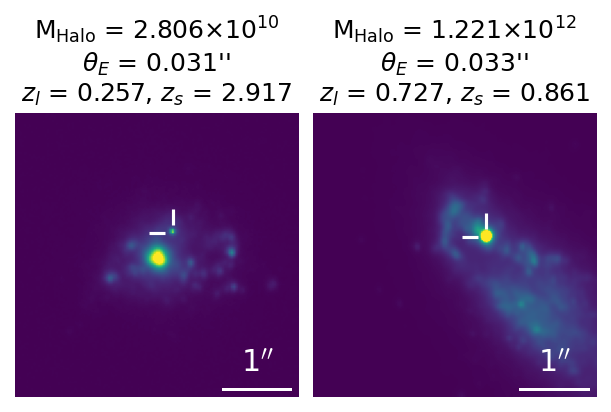

In [29]:
def rescale(im):
    image = (im-np.mean(im)) / np.std(im)
    scale = .05
    bkg = norm.rvs(loc=0.0, scale=scale, size=image.shape)
    exp_time = 10000
    poisson = image_util.add_poisson(image, exp_time=exp_time)
    return image# + bkg + poisson
def round_prob(p):
    p = round(p)
    a = round(np.log10(p))
    rem = p/10**a
    p = np.round(rem,3)
    return str(p)+r"$\times 10^{"+str(a)+"}$"

fig, axs = plt.subplots(1,2,dpi=150,figsize=(5,2.75))
inds = [129,403]
for i in range(2):
    im = rescale(x0[inds[i]]-envs[inds[i]])
    axs[i].imshow(im,vmin=np.percentile(im,1),vmax=np.percentile(im,99.9),origin="lower")
    axs[i].set_title(r'$\text{M}_{\text{Halo}}$ = '+round_prob(masses[inds[i]])+"\n"+r"$\theta_E$ = "+str(round(theta_E[inds[i]],3))+"''\n"+r"$z_{l}$ = "+str(round(z_lens[inds[i]],3))+r", $z_{s}$ = "+str(round(z_source[inds[i]],3))); axs[i].set_axis_off()
    
    xl, yl = np.unravel_index(np.argmax(x0[inds[i]]-no_lens[inds[i]]),im.shape)

    axs[i].hlines(xl, yl-10.5,yl-3.5, color="white", linewidth=1.5)
    axs[i].vlines(yl, xl+3.5,xl+10.5, color="white", linewidth=1.5)
    scalebar = ScaleBar(0.032165, "''", dimension='angle', length_fraction=0.25,
                       location='lower right',frameon=False,color="white",scale_loc="top",
                       font_properties={'size':'x-large'})
    axs[i].add_artist(scalebar)
    print(masses[inds[i]])

plt.subplots_adjust(hspace=0.05,wspace=0.05);

In [30]:
masses = np.load(path+"masses.npy")
np.argwhere(masses==1321157585482.9495)

array([[19923]])

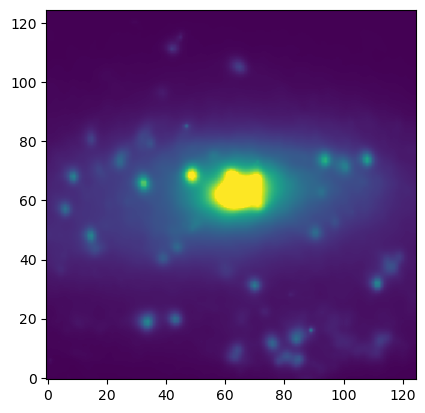

In [31]:
x0 = np.load(path+"images.npy")
im = x0[19923]
plt.imshow(im,origin="lower",vmin=np.percentile(im,1),vmax=np.percentile(im,99))